## Ejercicio manejo de datos y Limpieza

 - Importa los datos de FIFA.csv, Contienen información de jugadores de futbol
 - Realiza una limpieza de datos:
   - ¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?
   - Cambia las medidas de las variables Weight y Height a Kg y cm
   - Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
   - Arregla también las variables W/F, SM, IR
   - Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.
   - También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...
 - Tratamiento de valores nulos:
   - Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas
   - Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...
 - Valores extremos
   - Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos
   - Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.
 - Análisis descriptivo
   - Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
   - Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente. 
   - OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_fifa = pd.read_csv('../Data/fifa.csv')
df_fifa.head(10)

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
5,1740,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",...,55+2,55+2,58+2,55+2,49+2,49+2,49+2,55+2,19+2,71
6,1957,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",...,74+2,74+2,74+2,74+2,74+2,74+2,74+2,74+2,15+2,76
7,16647,257768,N. Mosti,22,Italy,AC Monza,LM,CAM,AC Monza 2019 ~ 2024,"5'10""",...,52+2,52+2,52+2,50+2,46+2,46+2,46+2,50+2,15+2,60
8,7770,225013,M. Čovilo,34,Bosnia Herzegovina,FC Lugano,CB,CDM CB,FC Lugano 2018 ~ 2021,"6'4""",...,64+1,64+1,59+2,60+2,68+-3,68+-3,68+-3,60+2,16+2,65
9,1602,179698,L. Grimi,35,Argentina,Club Atlético Huracán,CB,LB CB,Club Atlético Huracán 2020 ~ 2021,"6'0""",...,66+1,66+1,65+2,65+2,68+-1,68+-1,68+-1,65+2,16+2,67


In [3]:
df_fifa.info(102)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 102 columns):
Unnamed: 0          int64
ID                  int64
Name                object
Age                 int64
Nationality         object
Club                object
BP                  object
Position            object
Team & Contract     object
Height              object
Weight              object
foot                object
Growth              int64
Joined              object
Loan Date End       object
Value               object
Wage                object
Release Clause      object
Contract            object
Attacking           int64
Crossing            int64
Finishing           int64
Heading Accuracy    int64
Short Passing       int64
Volleys             float64
Skill               int64
Dribbling           int64
Curve               float64
FK Accuracy         int64
Long Passing        int64
Ball Control        int64
Movement            int64
Acceleration        int64
Sprint Speed 

In [4]:
df_fifa[['pies','pulgadas']] = df_fifa['Height'].str.split("'", expand=True)
df_fifa['pies']=df_fifa['pies'].astype(float)
df_fifa['pulgadas'] =df_fifa['pulgadas'].str.replace('"', '', regex=False)
df_fifa['pulgadas']=df_fifa['pulgadas'].astype(float)
df_fifa['pulgadas']=df_fifa['pulgadas']/12
df_fifa['pp']=df_fifa['pies']+df_fifa['pulgadas']
df_fifa['cm']=df_fifa['pp']*30.48
df_fifa


,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,LCB,CB,RCB,RB,GK,OVA,pies,pulgadas,pp,cm
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,54+1,54+1,54+1,58+1,15+1,64,5.0,0.750000,5.750000,175.26
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,48+2,48+2,48+2,53+2,18+2,77,6.0,0.000000,6.000000,182.88
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,41+2,41+2,41+2,53+2,12+2,80,5.0,0.333333,5.333333,162.56
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,58+2,57+2,14+2,59,5.0,0.833333,5.833333,177.80
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,61+2,61+2,61+2,63+2,15+2,65,5.0,0.916667,5.916667,180.34
5,1740,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",...,49+2,49+2,49+2,55+2,19+2,71,5.0,0.833333,5.833333,177.80
6,1957,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",...,74+2,74+2,74+2,74+2,15+2,76,6.0,0.000000,6.000000,182.88
7,16647,257768,N. Mosti,22,Italy,AC Monza,LM,CAM,AC Monza 2019 ~ 2024,"5'10""",...,46+2,46+2,46+2,50+2,15+2,60,5.0,0.833333,5.833333,177.80
8,7770,225013,M. Čovilo,34,Bosnia Herzegovina,FC Lugano,CB,CDM CB,FC Lugano 2018 ~ 2021,"6'4""",...,68+-3,68+-3,68+-3,60+2,16+2,65,6.0,0.333333,6.333333,193.04
9,1602,179698,L. Grimi,35,Argentina,Club Atlético Huracán,CB,LB CB,Club Atlético Huracán 2020 ~ 2021,"6'0""",...,68+-1,68+-1,68+-1,65+2,16+2,67,6.0,0.000000,6.000000,182.88


In [5]:
df_fifa['Weight']=df_fifa['Weight'].astype(str).str.replace('lbs','')

df_fifa['Weight']=df_fifa['Weight'].astype(float)

df_fifa['KG Weight']= df_fifa['Weight']*0.45359237
df_fifa

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CB,RCB,RB,GK,OVA,pies,pulgadas,pp,cm,KG Weight
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,54+1,54+1,58+1,15+1,64,5.0,0.750000,5.750000,175.26,73.028372
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,48+2,48+2,53+2,18+2,77,6.0,0.000000,6.000000,182.88,72.121187
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,41+2,41+2,53+2,12+2,80,5.0,0.333333,5.333333,162.56,60.781378
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,57+2,14+2,59,5.0,0.833333,5.833333,177.80,68.946040
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,61+2,61+2,63+2,15+2,65,5.0,0.916667,5.916667,180.34,68.038855
5,1740,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",...,49+2,49+2,55+2,19+2,71,5.0,0.833333,5.833333,177.80,69.853225
6,1957,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",...,74+2,74+2,74+2,15+2,76,6.0,0.000000,6.000000,182.88,69.853225
7,16647,257768,N. Mosti,22,Italy,AC Monza,LM,CAM,AC Monza 2019 ~ 2024,"5'10""",...,46+2,46+2,50+2,15+2,60,5.0,0.833333,5.833333,177.80,73.028372
8,7770,225013,M. Čovilo,34,Bosnia Herzegovina,FC Lugano,CB,CDM CB,FC Lugano 2018 ~ 2021,"6'4""",...,68+-3,68+-3,60+2,16+2,65,6.0,0.333333,6.333333,193.04,87.089735
9,1602,179698,L. Grimi,35,Argentina,Club Atlético Huracán,CB,LB CB,Club Atlético Huracán 2020 ~ 2021,"6'0""",...,68+-1,68+-1,65+2,16+2,67,6.0,0.000000,6.000000,182.88,73.935556


In [6]:

def reemplazarmas(texto):
    return texto.str.split('+')[0] 


for column in df_fifa.columns:
    for i in column:
        if "+" in i:
            df_fifa.columns[i]= reemplazarmas(df_fifa.columns[i])
            
print (df_fifa)

       Unnamed: 0      ID            Name  Age            Nationality  \
0            1954  184383       A. Pasche   26            Switzerland   
1            2225  188044   Alan Carvalho   30               China PR   
2            1959  184431     S. Giovinco   33                  Italy   
3            9815  233796        J. Evans   22                  Wales   
4           10074  234799      Y. Demoncy   23                 France   
5            1740  182411      Yu Hanchao   33               China PR   
6            1957  184392      M. Darmian   30                  Italy   
7           16647  257768        N. Mosti   22                  Italy   
8            7770  225013       M. Čovilo   34     Bosnia Herzegovina   
9            1602  179698        L. Grimi   35              Argentina   
10            457  138949      A. Alcáraz   37               Paraguay   
11          16117  255876       A. Trezza   21                Uruguay   
12           8183  226793      M. Polster   27     

In [7]:
import re
pattern = r'\+\d+'
def reemplazarmas(texto):
    return re.sub(pattern, '', texto)


for column in df_fifa.columns:
    for i in column:
        if "+" in i:
            df_fifa.columns[i]= reemplazarmas(df_fifa.columns[i])
            
print (df_fifa)

       Unnamed: 0      ID            Name  Age            Nationality  \
0            1954  184383       A. Pasche   26            Switzerland   
1            2225  188044   Alan Carvalho   30               China PR   
2            1959  184431     S. Giovinco   33                  Italy   
3            9815  233796        J. Evans   22                  Wales   
4           10074  234799      Y. Demoncy   23                 France   
5            1740  182411      Yu Hanchao   33               China PR   
6            1957  184392      M. Darmian   30                  Italy   
7           16647  257768        N. Mosti   22                  Italy   
8            7770  225013       M. Čovilo   34     Bosnia Herzegovina   
9            1602  179698        L. Grimi   35              Argentina   
10            457  138949      A. Alcáraz   37               Paraguay   
11          16117  255876       A. Trezza   21                Uruguay   
12           8183  226793      M. Polster   27     

In [8]:
df_fifa.head(100)

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CB,RCB,RB,GK,OVA,pies,pulgadas,pp,cm,KG Weight
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,54+1,54+1,58+1,15+1,64,5.0,0.750000,5.750000,175.26,73.028372
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,48+2,48+2,53+2,18+2,77,6.0,0.000000,6.000000,182.88,72.121187
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,41+2,41+2,53+2,12+2,80,5.0,0.333333,5.333333,162.56,60.781378
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,57+2,14+2,59,5.0,0.833333,5.833333,177.80,68.946040
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,61+2,61+2,63+2,15+2,65,5.0,0.916667,5.916667,180.34,68.038855
5,1740,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",...,49+2,49+2,55+2,19+2,71,5.0,0.833333,5.833333,177.80,69.853225
6,1957,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",...,74+2,74+2,74+2,15+2,76,6.0,0.000000,6.000000,182.88,69.853225
7,16647,257768,N. Mosti,22,Italy,AC Monza,LM,CAM,AC Monza 2019 ~ 2024,"5'10""",...,46+2,46+2,50+2,15+2,60,5.0,0.833333,5.833333,177.80,73.028372
8,7770,225013,M. Čovilo,34,Bosnia Herzegovina,FC Lugano,CB,CDM CB,FC Lugano 2018 ~ 2021,"6'4""",...,68+-3,68+-3,60+2,16+2,65,6.0,0.333333,6.333333,193.04,87.089735
9,1602,179698,L. Grimi,35,Argentina,Club Atlético Huracán,CB,LB CB,Club Atlético Huracán 2020 ~ 2021,"6'0""",...,68+-1,68+-1,65+2,16+2,67,6.0,0.000000,6.000000,182.88,73.935556


In [9]:
import pandas as pd
import re

#CHATGPT

# Expresión regular para eliminar "+ número"
pattern = r'\+\d+'

# Función para reemplazar "+ número" en un string
def reemplazarmas(texto):
    if isinstance(texto, str):  # Verifica si el valor es string
        return re.sub(pattern, '', texto)
    return texto  # Si no es string, lo deja igual

# Recorrer todas las columnas y filas
for column in df_fifa.columns:
    for i in range(len(df_fifa[column])):  # Iterar sobre las filas
        if isinstance(df_fifa.at[i, column], str) and "+" in df_fifa.at[i, column]:  # Verificar si hay "+"
            df_fifa.at[i, column] = reemplazarmas(df_fifa.at[i, column])  # Reemplazar el valor

            
print(df_fifa)


       Unnamed: 0      ID            Name  Age            Nationality  \
0            1954  184383       A. Pasche   26            Switzerland   
1            2225  188044   Alan Carvalho   30               China PR   
2            1959  184431     S. Giovinco   33                  Italy   
3            9815  233796        J. Evans   22                  Wales   
4           10074  234799      Y. Demoncy   23                 France   
5            1740  182411      Yu Hanchao   33               China PR   
6            1957  184392      M. Darmian   30                  Italy   
7           16647  257768        N. Mosti   22                  Italy   
8            7770  225013       M. Čovilo   34     Bosnia Herzegovina   
9            1602  179698        L. Grimi   35              Argentina   
10            457  138949      A. Alcáraz   37               Paraguay   
11          16117  255876       A. Trezza   21                Uruguay   
12           8183  226793      M. Polster   27     

In [10]:
df_fifa[['W/F', 'SM', 'A/W', 'D/W', 'IR','Value', 'Wage']]

,W/F,SM,A/W,D/W,IR,Value,Wage
0,4 ★,2★,High,Medium,1 ★,€525K,€4K
1,3 ★,4★,High,Low,2 ★,€8.5M,€23K
2,4 ★,4★,High,Medium,2 ★,€9M,€49K
3,2 ★,2★,Medium,Medium,1 ★,€275K,€4K
4,2 ★,3★,Low,Medium,1 ★,€725K,€2K
5,4 ★,3★,High,Low,1 ★,€1.4M,€11K
6,5 ★,3★,Medium,High,2 ★,€6M,€28K
7,2 ★,2★,Medium,Medium,1 ★,€300K,€800
8,2 ★,2★,Medium,Medium,1 ★,€210K,€2K
9,3 ★,3★,Medium,Medium,1 ★,€220K,€4K


In [11]:
### import re
#pattern = r'\+\d+'
def reemplazarestrella(texto):
    return texto.split('★')[0] 


for column in ['W/F', 'SM', 'A/W', 'D/W', 'IR','Value', 'Wage']:
    for i in column:
        if "★" in i:
            df_fifa.columns[i]= reemplazarestrella(column)
            
df_fifa[['W/F', 'SM', 'A/W', 'D/W', 'IR','Value', 'Wage']]

,W/F,SM,A/W,D/W,IR,Value,Wage
0,4 ★,2★,High,Medium,1 ★,€525K,€4K
1,3 ★,4★,High,Low,2 ★,€8.5M,€23K
2,4 ★,4★,High,Medium,2 ★,€9M,€49K
3,2 ★,2★,Medium,Medium,1 ★,€275K,€4K
4,2 ★,3★,Low,Medium,1 ★,€725K,€2K
5,4 ★,3★,High,Low,1 ★,€1.4M,€11K
6,5 ★,3★,Medium,High,2 ★,€6M,€28K
7,2 ★,2★,Medium,Medium,1 ★,€300K,€800
8,2 ★,2★,Medium,Medium,1 ★,€210K,€2K
9,3 ★,3★,Medium,Medium,1 ★,€220K,€4K


In [12]:
def reemplazarestrellas(texto):
   return texto.astype(str).str.replace('★', '', regex=False)


for column in df_fifa[['W/F', 'SM', 'A/W', 'D/W', 'IR','Value', 'Wage']]:
    
    df_fifa[column] = reemplazarestrellas(df_fifa[column])

            
df_fifa[['W/F', 'SM', 'A/W', 'D/W', 'IR','Value', 'Wage']]

,W/F,SM,A/W,D/W,IR,Value,Wage
0,4,2,High,Medium,1,€525K,€4K
1,3,4,High,Low,2,€8.5M,€23K
2,4,4,High,Medium,2,€9M,€49K
3,2,2,Medium,Medium,1,€275K,€4K
4,2,3,Low,Medium,1,€725K,€2K
5,4,3,High,Low,1,€1.4M,€11K
6,5,3,Medium,High,2,€6M,€28K
7,2,2,Medium,Medium,1,€300K,€800
8,2,2,Medium,Medium,1,€210K,€2K
9,3,3,Medium,Medium,1,€220K,€4K


In [13]:
def convertir_a_entero(valor):
    # Eliminar el símbolo '€' y convertir a número
    valor = valor.replace('€', '').replace(' ', '')
    if 'M' in valor:
        return int(float(valor.replace('M', '')) * 1_000_000)
    elif 'K' in valor:
        return int(float(valor.replace('K', '')) * 1_000)
    return int(float(valor))
# Aplicar la función a las columnas Value y Wage
df_fifa['Value'] = df_fifa['Value'].apply(convertir_a_entero)
df_fifa['Wage'] = df_fifa['Wage'].apply(convertir_a_entero)

df_fifa[['Value', 'Wage']]

,Value,Wage
0,525000,4000
1,8500000,23000
2,9000000,49000
3,275000,4000
4,725000,2000
5,1400000,11000
6,6000000,28000
7,300000,800
8,210000,2000
9,220000,4000


#Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero.
Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.



In [14]:
dictBP={
    "GK":"Portero",
"RB":"Defensa",
"CB":"Defensa",
"LB":"Defensa",
"CM":"Mediocampista",
"CAM":"Mediocampista",
"CDM":"Mediocampista",
"LM":"Mediocampista",
"RM":"Mediocampista",
"LWB":"Mediocampista",
"RWB":"Mediocampista",
"ST":"Delantero",
"RW":"Delantero",
"LW":"Delantero",
"CF":"Delantero",
}

df_fifa['BP']=df_fifa['BP'].replace(dictBP)
df_fifa['BP']

0        Mediocampista
1            Delantero
2        Mediocampista
3        Mediocampista
4        Mediocampista
5        Mediocampista
6              Defensa
7        Mediocampista
8              Defensa
9              Defensa
10             Defensa
11       Mediocampista
12       Mediocampista
13             Defensa
14             Defensa
15       Mediocampista
16             Portero
17       Mediocampista
18           Delantero
19       Mediocampista
20             Portero
21             Portero
22           Delantero
23       Mediocampista
24           Delantero
25       Mediocampista
26             Defensa
27       Mediocampista
28           Delantero
29       Mediocampista
             ...      
13670        Delantero
13671    Mediocampista
13672          Portero
13673          Portero
13674          Defensa
13675    Mediocampista
13676          Defensa
13677          Defensa
13678    Mediocampista
13679        Delantero
13680        Delantero
13681    Mediocampista
13682      

In [15]:
# Análisis de calidad de la base de datos
print("TOTAL NUMBER OF ROWS: ",len(df_fifa),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n")
print("NUMBER OF UNIQUE VALUES:",df_fifa.nunique(),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES:",round((df_fifa.nunique()/len(df_fifa)*100),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("% OF NAN VALUES IS: ",round(100*(df_fifa.isnull().sum() / len(df_fifa)),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")

TOTAL NUMBER OF ROWS:  13700 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

NUMBER OF UNIQUE VALUES: Unnamed: 0          13700
ID                  13700
Name                13064
Age                    29
Nationality           160
Club                  897
BP                      4
Position              583
Team & Contract      8524
Height                 21
Weight                 55
foot                    2
Growth                 28
Joined               1803
Loan Date End          35
Value                 210
Wage                  142
Release Clause       1147
Contract              385
Attacking             359
Crossing               89
Finishing              92
Heading Accuracy       89
Short Passing          85
Volleys                87
Skill                 386
Dribbling              91
Curve                  90
FK Accuracy            89
Long Passing           84
                    ...  
LW                    134
LF                    122
CF         

In [16]:
valores_nulos = df_fifa.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0] #Només les majors a 0
print("Variables con valores nulos y su conteo:")
print(valores_nulos)


Variables con valores nulos y su conteo:
Club                 21
Position            343
Joined               44
Loan Date End     12961
Volleys              44
Curve                44
Agility              44
Balance              44
Jumping              44
Interceptions         7
Positioning           7
Vision               44
Composure           329
Sliding Tackle       44
dtype: int64


In [17]:
#Elimino Loan Date End
df_fifa.drop(columns=['Loan Date End'], inplace=True)

print(df_fifa)

       Unnamed: 0      ID            Name  Age            Nationality  \
0            1954  184383       A. Pasche   26            Switzerland   
1            2225  188044   Alan Carvalho   30               China PR   
2            1959  184431     S. Giovinco   33                  Italy   
3            9815  233796        J. Evans   22                  Wales   
4           10074  234799      Y. Demoncy   23                 France   
5            1740  182411      Yu Hanchao   33               China PR   
6            1957  184392      M. Darmian   30                  Italy   
7           16647  257768        N. Mosti   22                  Italy   
8            7770  225013       M. Čovilo   34     Bosnia Herzegovina   
9            1602  179698        L. Grimi   35              Argentina   
10            457  138949      A. Alcáraz   37               Paraguay   
11          16117  255876       A. Trezza   21                Uruguay   
12           8183  226793      M. Polster   27     

In [18]:
#Elimino registros:
df_fifa.dropna(subset=['Joined', 'Sliding Tackle', 'Vision'], inplace=True)


In [19]:
#Columnes numériques faig mitjana 
numerical_cols = ['Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Vision', 'Composure']
for col in numerical_cols:
    df_fifa[col] = df_fifa[col].fillna(df_fifa[col].mean())  # O usar median() si prefieres
df_fifa['Composure'] = df_fifa['Composure'].fillna(df_fifa['Composure'].median())

# Per columnes categóriques faig la mode
df_fifa['Club'] = df_fifa['Club'].fillna(df_fifa['Club'].mode()[0])
df_fifa['Position'] = df_fifa['Position'].fillna(df_fifa['BP'])

# Com hi ha pocs valors que siguin nuls, borror aquelles files. 
df_fifa.dropna(subset=['Interceptions', 'Positioning'], inplace=True)

In [20]:
extreme_values = {}

for col in df_fifa.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_fifa[col].quantile(0.25)
    Q3 = df_fifa[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR #Identifica valors extrems baixos
    upper_bound = Q3 + 1.5 * IQR #Identifica valors extrems alts
    
    # Contar valores extremos
    num_extremes = df_fifa[(df_fifa[col] < lower_bound) | (df_fifa[col] > upper_bound)].shape[0]
    extreme_values[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Extremes': num_extremes
    }

extreme_df = pd.DataFrame(extreme_values).T
print(extreme_df)

                   Lower Bound  Number of Extremes   Upper Bound
Unnamed: 0       -8.586000e+03                 0.0  2.580000e+04
ID                1.444192e+05               413.0  3.039012e+05
Age               9.000000e+00                11.0  4.100000e+01
Weight            1.210000e+02                61.0  2.090000e+02
Growth           -1.350000e+01                41.0  2.250000e+01
Value            -2.812500e+06              1651.0  5.687500e+06
Wage             -1.400000e+04              1379.0  2.600000e+04
Attacking         1.185000e+02              1265.0  4.185000e+02
Crossing          5.000000e+00                 0.0  1.010000e+02
Finishing        -1.350000e+01                 0.0  1.105000e+02
Heading Accuracy  1.500000e+01               816.0  9.500000e+01
Short Passing     3.650000e+01              1228.0  8.850000e+01
Volleys          -8.500000e+00                 0.0  9.950000e+01
Skill             1.015000e+02              1003.0  4.495000e+02
Dribbling         2.75000

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenim els 15 camps amb més extrems
top_extreme_values = extreme_df.nlargest(15, 'Number of Extremes')

#viSULITZEM ELS TOP 15 CAMPS MES EXTREMS
plt.figure(figsize=(12, 6))
sns.barplot(x=top_extreme_values.index, y=top_extreme_values['Number of Extremes'], palette='viridis', hue=top_extreme_values.index)
plt.title('Top 10 Variables con Más Valores Extremos')
plt.xlabel('Variables')
plt.ylabel('Número de Valores Extremos')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Desactivar la leyenda
plt.show()

# Boxpplot només del top 3
top_3_extreme_values = top_extreme_values.nlargest(3, 'Number of Extremes')
plt.figure(figsize=(15, 8))
for i, var in enumerate(top_3_extreme_values.index):
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(x=df_fifa[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 1 Axes>

<Figure size 1500x800 with 3 Axes>

In [22]:
modified_columns = {}  

for col, info in extreme_values.items():
    # Verificar si hay valores extremos
    if info['Number of Extremes'] > 0:
        if df_fifa[col].dtype in ['int64', 'float64']:
            absurd_indices = df_fifa[df_fifa[col] < 0].index  #VALORS NEGATIUS
            if not absurd_indices.empty:
                df_fifa.drop(absurd_indices, inplace=True) 

        upper_limit = df_fifa[col].quantile(0.99)  # Limitar al percentil 99
        num_modified = (df_fifa[col] > upper_limit).sum()  # Contar valores que se modifican
        df_fifa[col] = df_fifa[col].where(df_fifa[col] <= upper_limit, upper_limit)
        if num_modified > 0:
            modified_columns[col] = num_modified

# Imprimir las columnas modificadas y el num de valores ajustados
print("Columnas modificadas y número de valores ajustados:")
for column, count in modified_columns.items():
    print(f"{column}: {count} valores ajustados")

Columnas modificadas y número de valores ajustados:
ID: 137 valores ajustados
Age: 126 valores ajustados
Weight: 118 valores ajustados
Growth: 109 valores ajustados
Value: 137 valores ajustados
Wage: 132 valores ajustados
Attacking: 137 valores ajustados
Heading Accuracy: 132 valores ajustados
Short Passing: 111 valores ajustados
Skill: 128 valores ajustados
Dribbling: 123 valores ajustados
Long Passing: 100 valores ajustados
Ball Control: 121 valores ajustados
Movement: 126 valores ajustados
Acceleration: 118 valores ajustados
Sprint Speed: 118 valores ajustados
Agility: 102 valores ajustados
Reactions: 109 valores ajustados
Balance: 118 valores ajustados
Power: 125 valores ajustados
Shot Power: 89 valores ajustados
Jumping: 115 valores ajustados
Stamina: 132 valores ajustados
Strength: 92 valores ajustados
Mentality: 133 valores ajustados
Positioning: 105 valores ajustados
Vision: 122 valores ajustados
Composure: 132 valores ajustados
Goalkeeping: 127 valores ajustados
GK Diving: 128

In [23]:
columnas_df = df_fifa.columns.tolist()
print(columnas_df)


['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', '

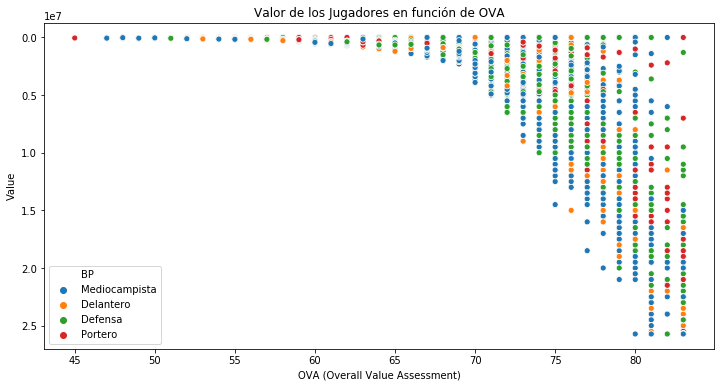

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_fifa, x='OVA', y='Value', hue='BP')
plt.title('Valor de los Jugadores en función de OVA')
plt.xlabel('OVA (Overall Value Assessment)')
plt.ylabel('Value')

# Invertir el eje y
plt.gca().invert_yaxis()

plt.show()


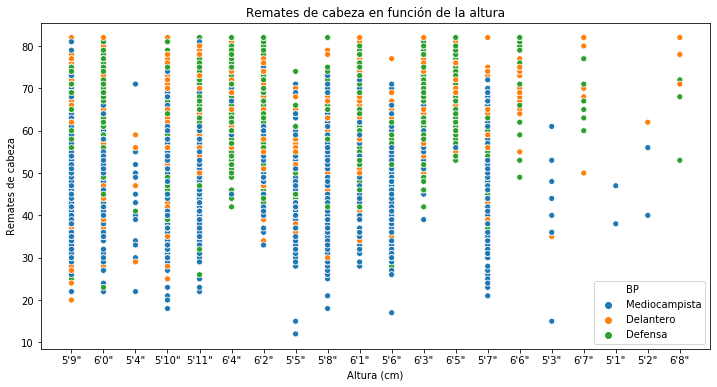

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# ELIMINO AL PORTERO PORQUE NO LE DA MUCHO DE CABEZA
df_fifa_filtered = df_fifa[df_fifa['BP'] != 'Portero']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_fifa_filtered, x='Height', y='Heading Accuracy', hue='BP')
plt.title('Remates de cabeza en función de la altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Remates de cabeza')
plt.show()
